# Mapping multiple organizations with getorg
## Installing and importing libraries

In [1]:
!pip install getorg ipyleaflet
import getorg

IPywidgets and ipyleaflet support enabled.


To make more than 60 queries per hour, you need to log in with your Github account. You can do this by calling:

    Github(login_or_token=your_username, password=your_password).
However, the better way is to [get an API token](https://github.com/settings/tokens) (you don't have to grant it any privileges to query public repositories) and just pass this token. I've got mine stored in a file called ghlogin.py (which I have not uploaded to Github), which I import.

In [2]:
from github import Github
import ghlogin
gh = Github(login_or_token=ghlogin.gh_key)

With getorg, we are working with the orgmap module, so all the functions are called with a prefix of:

    getorg.orgmap.
We first create a list containing strings of all the organizations. You can also just send a single organization, in either a list of one or just a string.

## The map_orgs function
### Parameters

The getorg.orgmap.map_orgs function takes in two to four parameters:
* github_obj: a Github API object, which we created when we logged in in the previous cell
* org_list_or_object: A list of strings containing the names of organizations to map, a string containing a single organization, or a Github organization object
* debug: A debug level (optional). 
  * 0 is silent, no output
  * 1 (default) prints the name of the org queried and one character per contributor queried: . for success, E for error
  * 2 (what we are calling here) prints everything in level 1, as well as the name of the repository queried
  * 3 prints everything in level 2, as well as the location of each contributor or the error raised
* exclude_usernames: A list of strings containing usernames to exclude from the map and location dictionary
  
### Returned values

The map_orgs function returns three objects:
* org_map: an ipyleaflet Map object that will display inline in a Jupyter notebook (type: ipyleaflet.leaflet.Map)
* org_locations: a dictionary with the key value pairs { Github username URL : geopy Location object }
  * Note: geopy Location objects have many features. You can find the latitude and longitude in loc.latitude / loc.longitude, for example.
* org_metadata: a dictionary with four key value pairs:
  * user_loc_count: the number of unique usernames in the map and location dictionary
  * error_count: the number of times an error was thrown when querying a contributor's location
  * no_loc_count: the number of users who have no location set in their Github profile
  * duplicate_count: the number of times a username was found in multiple repositories 
  
And then in calling the function, we are using the %time command in Jupyter notebooks, which you can put before any command to have python measure how long it takes to execute the function. We see it takes 23 minutes of 'wall time' to get all the contributor locations for each of these organizations.

In [3]:
orgs = ["jupyter","ipython","jupyter-attic","jupyterhub"]
%time org_map, org_locations, org_metadata = getorg.orgmap.map_orgs(gh, orgs, debug=2)


Querying organization Project Jupyter

Querying repository nbviewer
............................................
Querying repository nbconvert-examples
.....
Querying repository colaboratory
.............
Querying repository jupyter.github.io
...................
Querying repository design
.........
Querying repository nbcache
..
Querying repository nbgrader
............
Querying repository tmpnb
.....................
Querying repository nature-demo
......
Querying repository jupyter-drive
.........
Querying repository tmpnb-redirector
...
Querying repository tmpnb-deploy
...
Querying repository docker-demo-images
......................
Querying repository try.jupyter.org
...
Querying repository strata-sv-2015-tutorial
..
Querying repository testpath
.
Querying repository scipy-2015-advanced-topics
.
Querying repository jupyter_core
..............
Querying repository nbformat
........................
Querying repository jupyter_client
..................................................


In [4]:
org_metadata

{'duplicate_count': 584,
 'error_count': 0,
 'no_loc_count': 653,
 'user_loc_count': 724}

## Displaying the map
In a Jupyter notebook with ipyleaflet support, we can display the map by referring to the org_map object. Note that these do not always render well if you are not running a notebook on a Jupyter server (i.e. if you are viewing this on github or nbviewer).

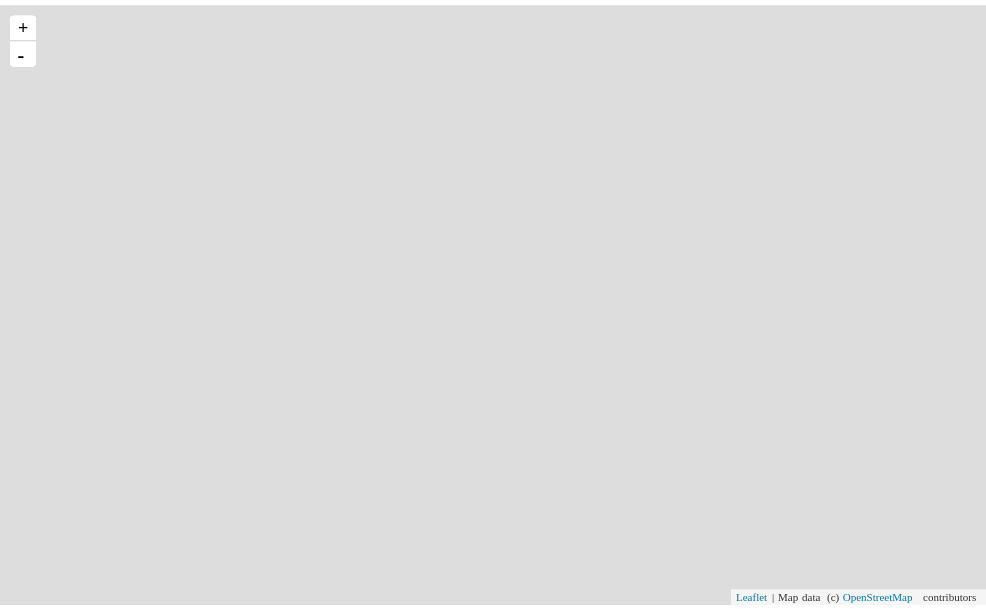

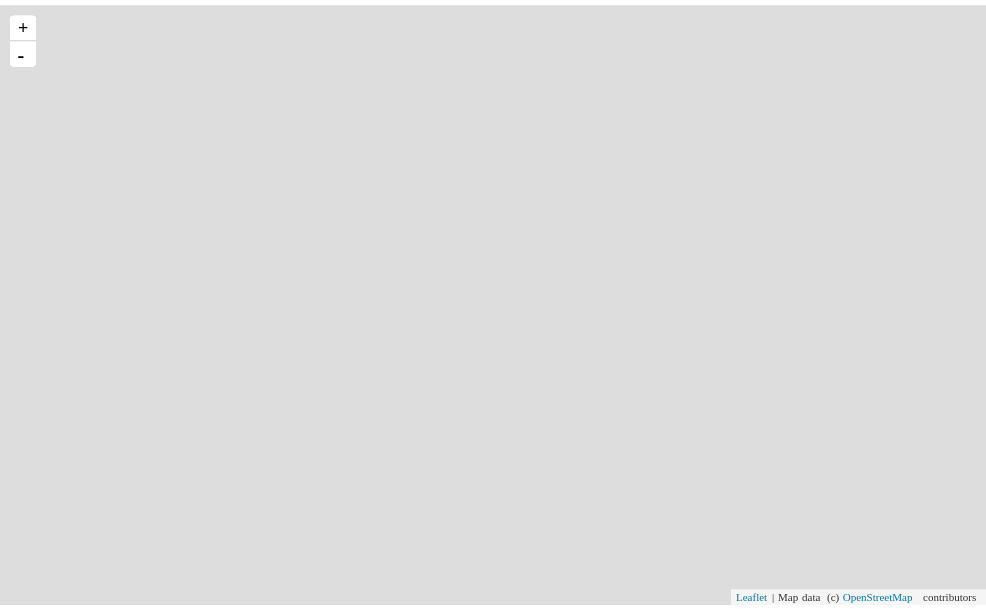

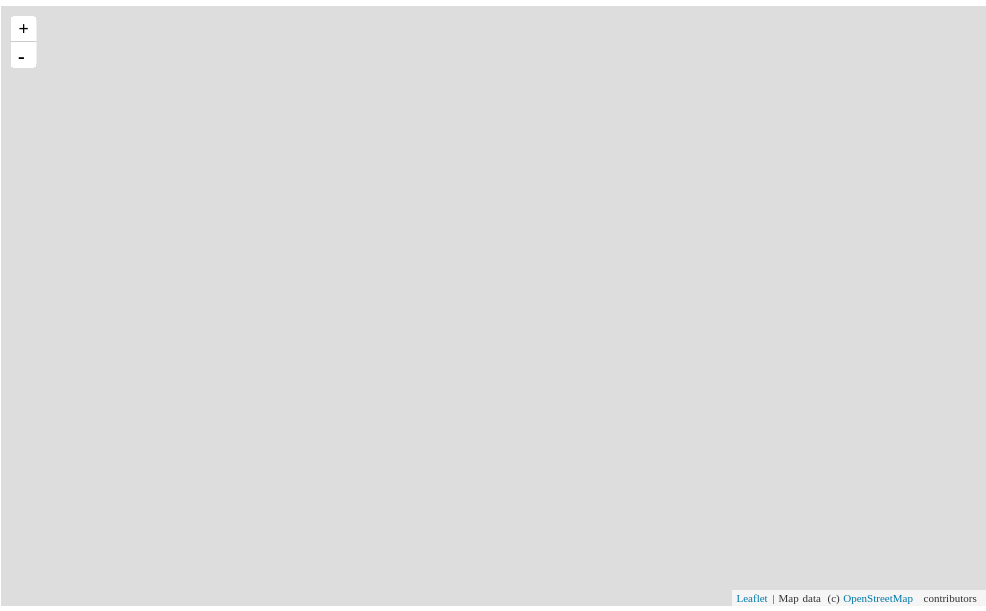

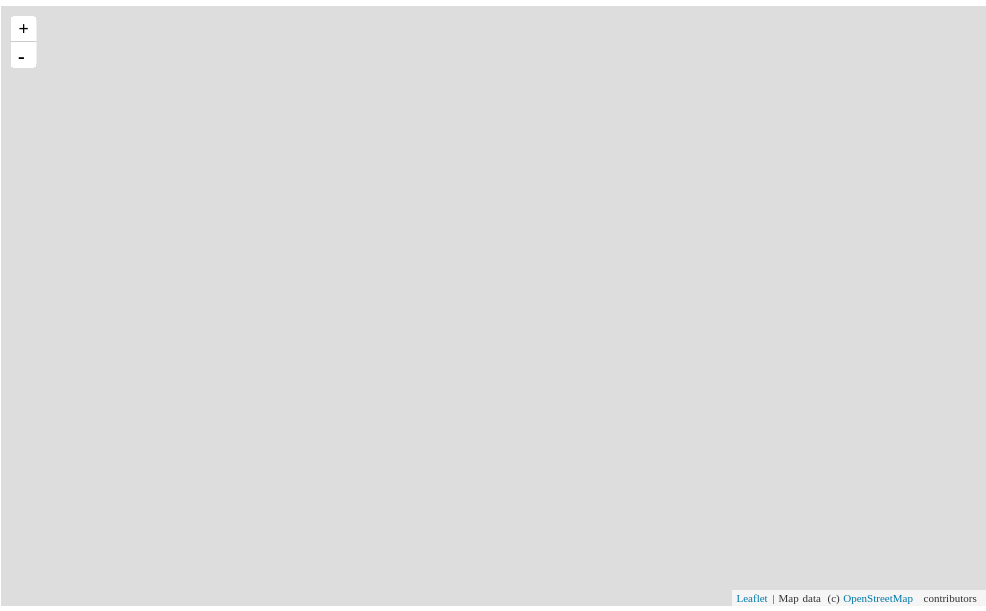

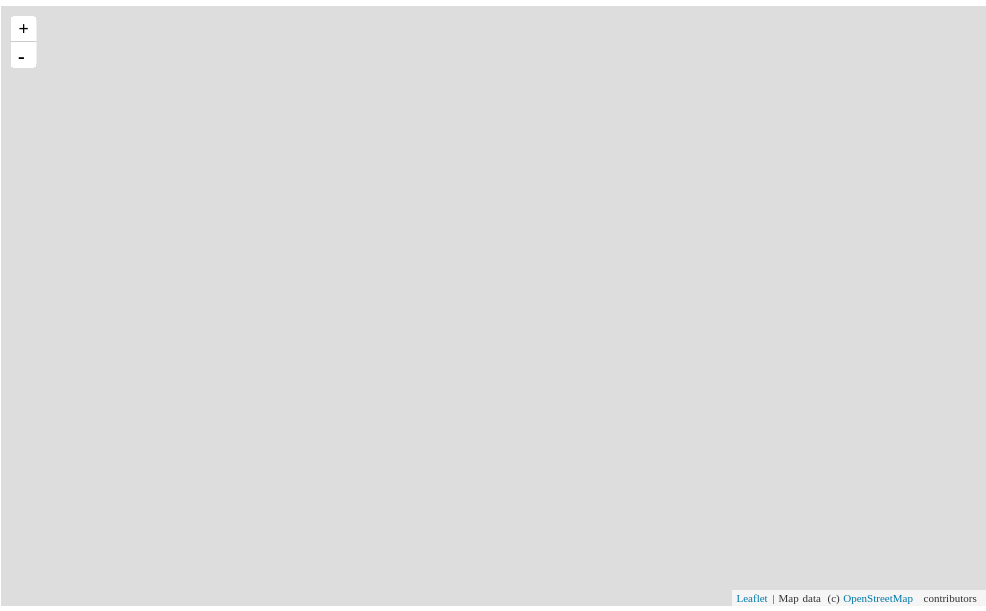

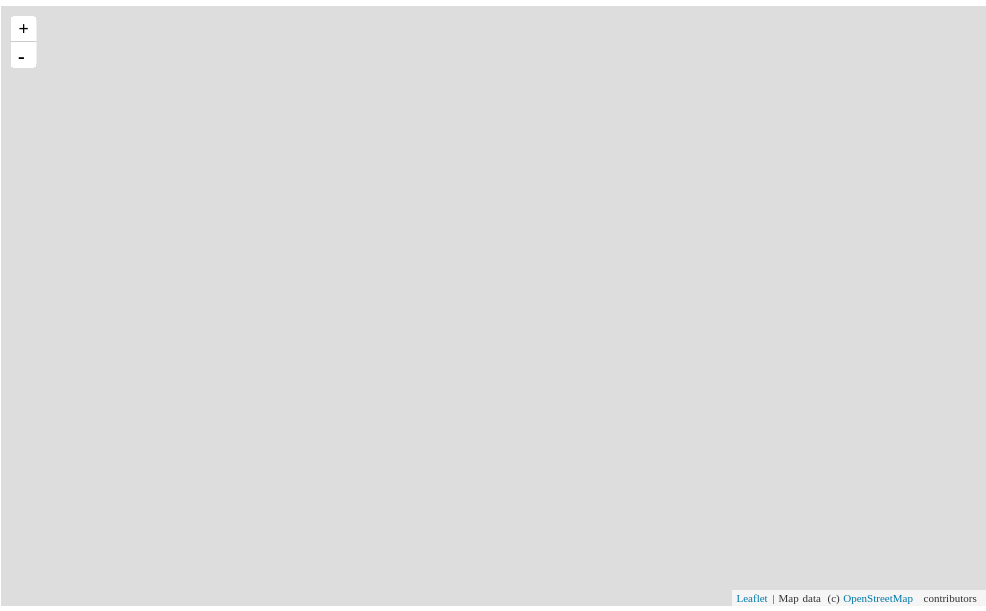

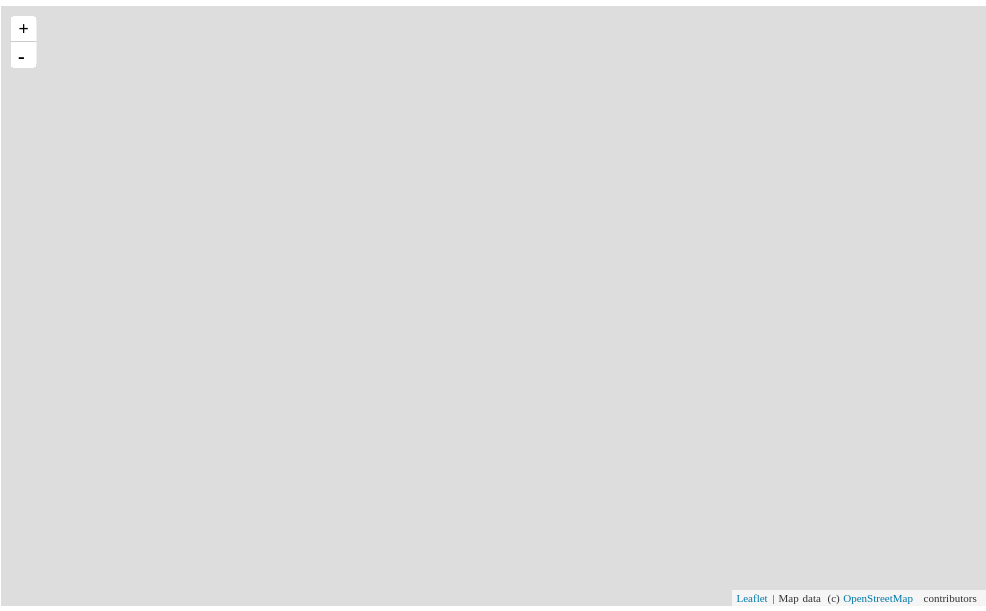

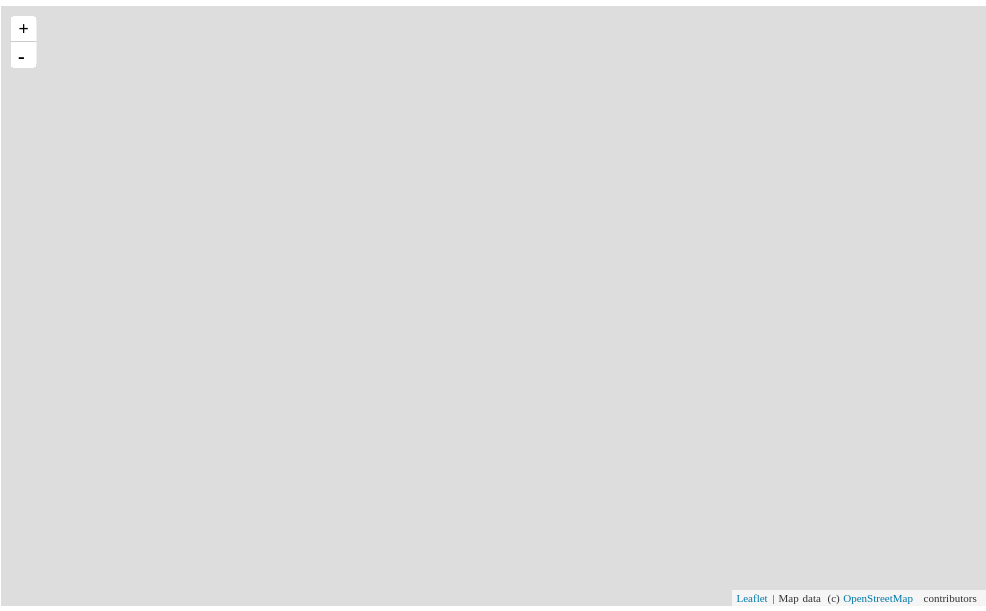

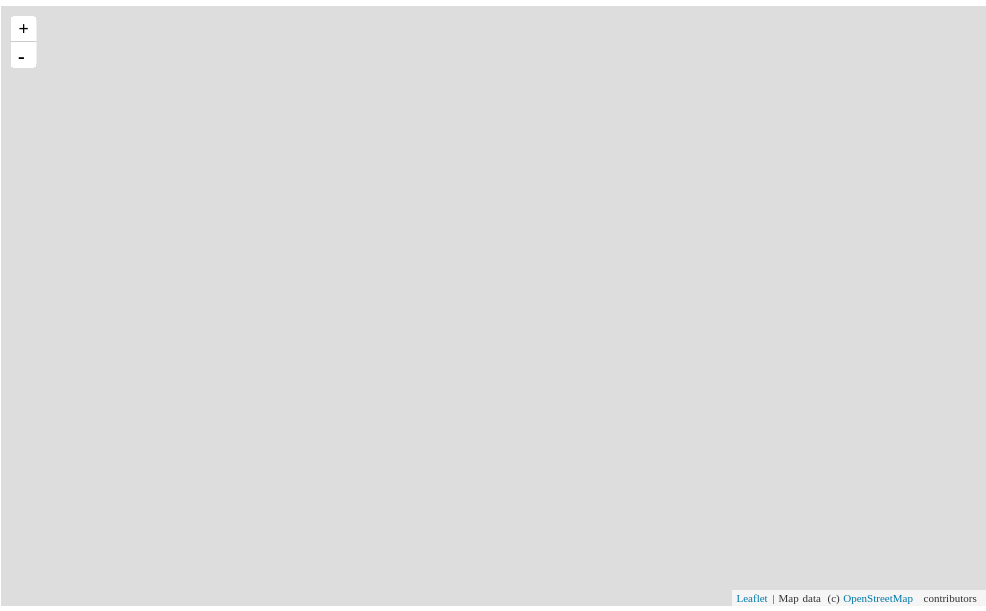

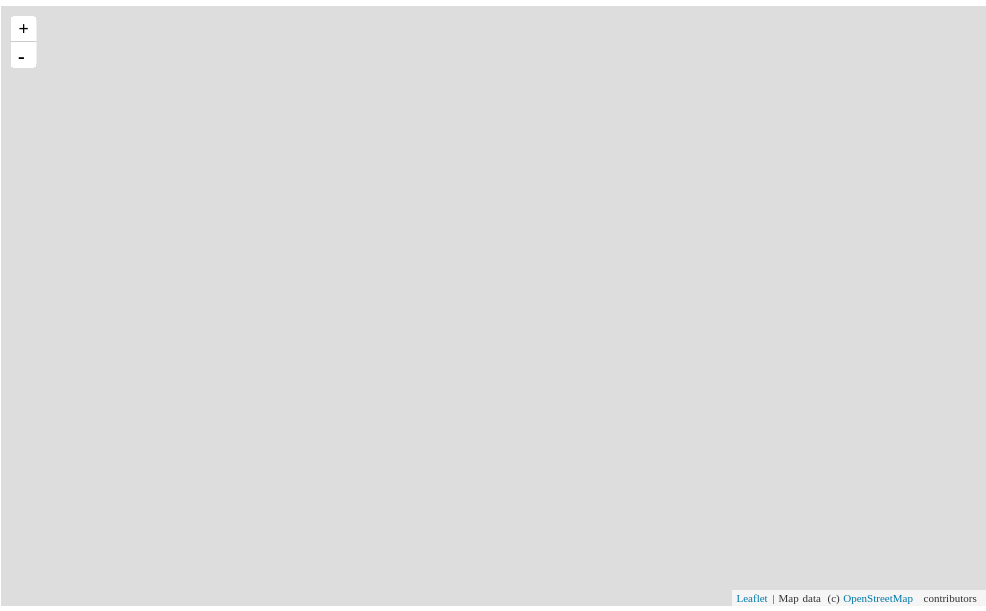

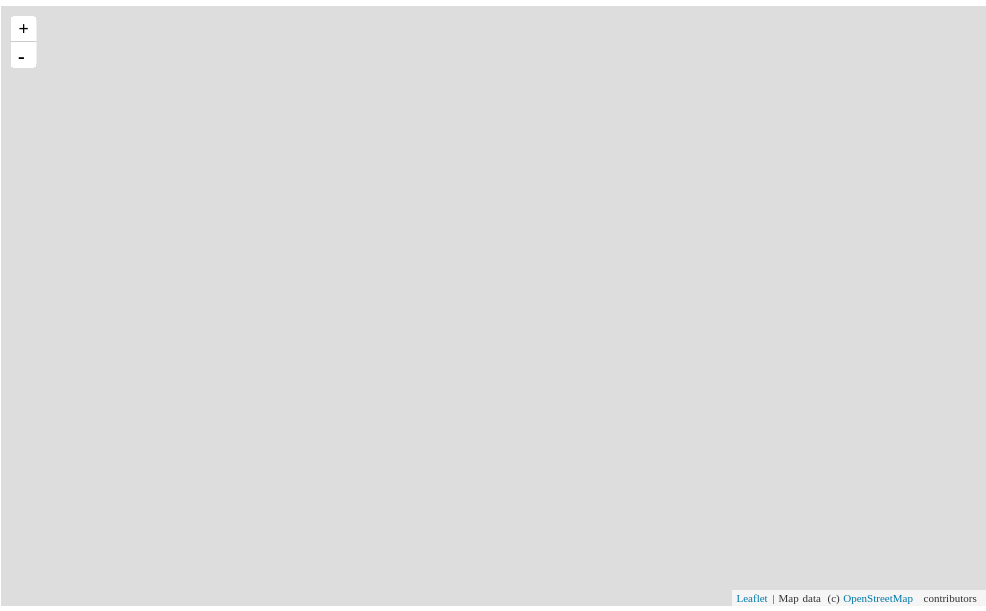

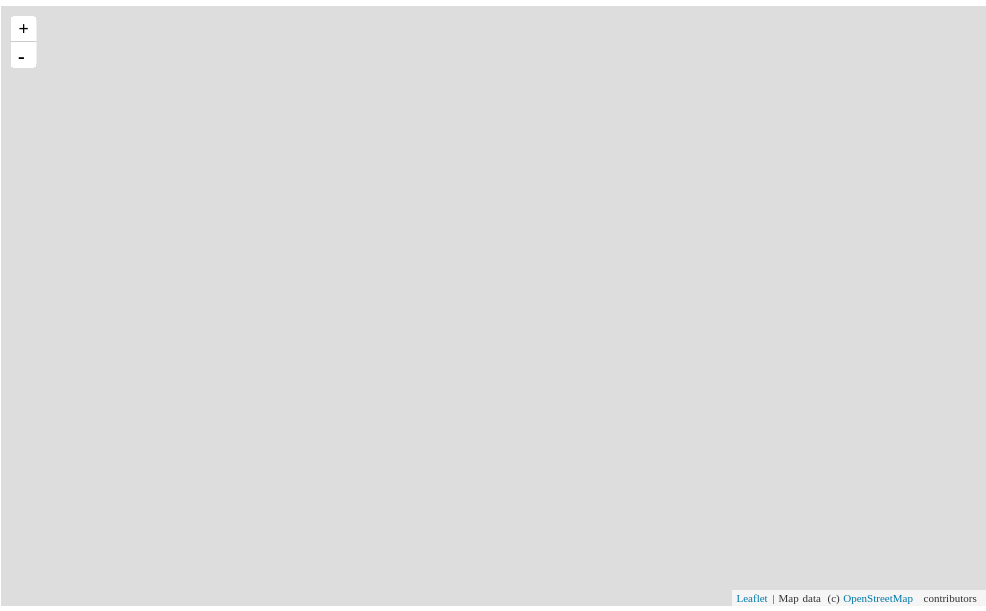

In [5]:
org_map
    

You can export this to embedable HTML files with the Widgets->Embed Widgets code in the Jupyter notebook menu bar.

## Writing the map to a file

In [45]:
getorg.orgmap.location_dict_to_jsvar(org_locations, "jupyter-locations.js")

'Written to jupyter-locations.js'

For the clustered standalone HTML map, this can then be imported with the HTML / Javascript file in this directory (jupyter.html).